In [22]:
import pandas as pd
import os

from scipy.ndimage import label

from Perceptron import Perceptron

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

print('URL : ', s)

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [23]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [24]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

In [25]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


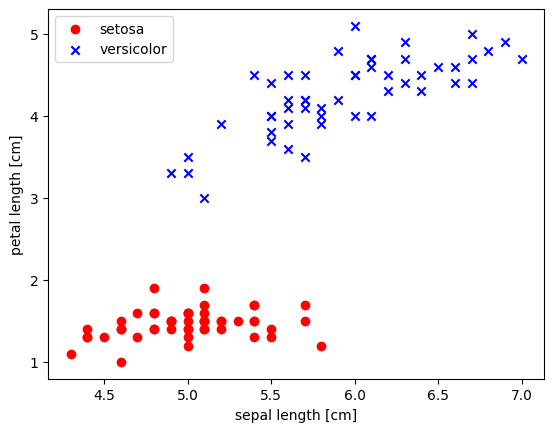

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 4 번째 칸 100개 출력(타겟 데이터)
y = np.where(y == 'Iris-setosa', -1, 1) # 1(Iris-setosa), -1(Iris-virginica)

X = df.iloc[0:100, [0, 2]].values # 0 => 꽃 받침 길이, 2 => 꽃잎 길이

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

X Shape 1231232 :  2
weight :  [ 0.01624345 -0.00611756 -0.00528172]
zipped :  <zip object at 0x174d54980>


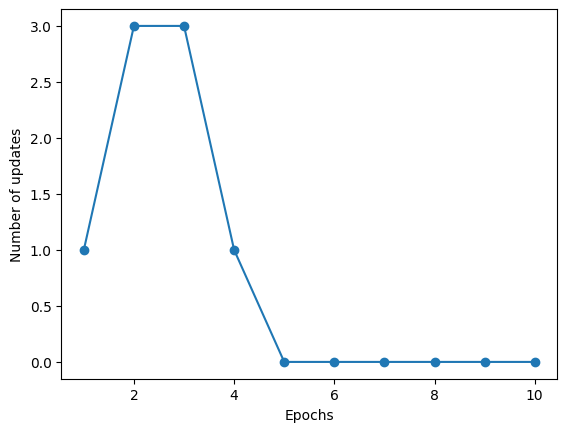

In [27]:
from Perceptron import Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()